In [1]:
from package import *

In [2]:
provider1 = IBMQ.load_account()
provider1 = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider1.get_backend('ibmq_jakarta')
provider2 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
quito = provider2.get_backend('ibmq_quito')
manila = provider2.get_backend('ibmq_manila')

In [3]:
noisy_jakarta = QasmSimulator.from_backend(jakarta)
noisy_quito = QasmSimulator.from_backend(quito)
noisy_manila = QasmSimulator.from_backend(manila)

# 3 Qubit Experiments

## Calibration and Noiseless Simulations

Let us begin by calibrating our approximate time evolution circuits. To do so, we simulate their execution on a noiseless backend, and compute the output fidelities. We do so before and after compilation, and as a function of the number of trotter steps; to be able to check for compilation accuracy errors as well as the trotterization tradeoff.

In [4]:
noiseless1st = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = True, verbose = False)
noiseless2nd = product_experiment(np.pi, order = 2, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = True, verbose = False)
noiseless4th = product_experiment(np.pi, order = 4, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = True, verbose = False)
noiseless6th = product_experiment(np.pi, order = 6, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0005 ± 0.0004
5 Trotterization steps
state tomography fidelity = 0.2557 ± 0.0006
6 Trotterization steps
state tomography fidelity = 0.5710 ± 0.0028
7 Trotterization steps
state tomography fidelity = 0.7539 ± 0.0013
8 Trotterization steps
state tomography fidelity = 0.8536 ± 0.0008
9 Trotterization steps
state tomography fidelity = 0.9069 ± 0.0005
10 Trotterization steps
state tomography fidelity = 0.9380 ± 0.0004
11 Trotterization steps
state tomography fidelity = 0.9572 ± 0.0007
12 Trotterization steps
state tomography fidelity = 0.9682 ± 0.0008
13 Trotterization steps
state tomography fidelity = 0.9766 ± 0.0014
14 Trotterization steps
state tomography fidelity = 0.9809 ± 0.0008
15 Trotterization steps
state tomography fidelity = 0.9845 ± 0.0002
16 Trotterization steps
state tomography fidelity = 0.9867 ± 0.0006
17 Trotterization steps
state tomography fidelity = 0.9893 ± 0.0010
18 Trotterization steps
state tomography fidelity = 0.

In [ ]:
uncnoiseless1st = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = False, verbose = False)
uncnoiseless2nd = product_experiment(np.pi, order = 2, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = False, verbose = False)
uncnoiseless4th = product_experiment(np.pi, order = 4, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = False, verbose = False)
uncnoiseless6th = product_experiment(np.pi, order = 6, min_steps = 4, max_steps = 20, backend = sim, repetitions = 3, compiler = False, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0001 ± 0.0001
5 Trotterization steps
state tomography fidelity = 0.2556 ± 0.0008
6 Trotterization steps
state tomography fidelity = 0.5707 ± 0.0037
7 Trotterization steps
state tomography fidelity = 0.7562 ± 0.0015
8 Trotterization steps
state tomography fidelity = 0.8529 ± 0.0010
9 Trotterization steps
state tomography fidelity = 0.9061 ± 0.0002
10 Trotterization steps
state tomography fidelity = 0.9376 ± 0.0007
11 Trotterization steps
state tomography fidelity = 0.9568 ± 0.0006
12 Trotterization steps
state tomography fidelity = 0.9685 ± 0.0018
13 Trotterization steps
state tomography fidelity = 0.9758 ± 0.0005
14 Trotterization steps
state tomography fidelity = 0.9806 ± 0.0003
15 Trotterization steps
state tomography fidelity = 0.9831 ± 0.0013
16 Trotterization steps
state tomography fidelity = 0.9868 ± 0.0004
17 Trotterization steps
state tomography fidelity = 0.9885 ± 0.0008
18 Trotterization steps
state tomography fidelity = 0.

In [ ]:
plt.scatter(range(4, 21), noiseless1st,  label = "k=1")
plt.scatter(range(4, 21), noiseless2nd, label = "k=2")
plt.scatter(range(4, 21), noiseless4th, label = "k=4")
plt.scatter(range(4, 21), noiseless6th, label = "k=6")

plt.title("Noiseless Evaluation of the Compiled Product Formula Circuits")

plt.xticks(range(4, 21, 2))

plt.legend(loc='bottom right')

plt.xlabel("Number of Trotter Steps")
plt.ylabel("Average Fidelity")

plt.show()

In [ ]:
plt.scatter(range(4, 21), uncnoiseless1st,  label = "k=1")
plt.scatter(range(4, 21), uncnoiseless2nd, label = "k=2")
plt.scatter(range(4, 21), uncnoiseless4th, label = "k=4")
plt.scatter(range(4, 21), uncnoiseless6th, label = "k=6")

plt.title("Noiseless Evaluation of the Uncompiled Product Formula Circuits")

plt.xticks(range(4, 21, 2))

plt.legend(loc='bottom right')

plt.xlabel("Number of Trotter Steps")
plt.ylabel("Average Fidelity")

plt.show()

## Noisy Simulations

### Jakarta Simulation w/o Compilation

In [4]:
unc_second_order_noisy_jakarta = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = noisy_jakarta, repetitions = 5, compiler = False, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0236 ± 0.0023
5 Trotterization steps
state tomography fidelity = 0.1935 ± 0.0027
6 Trotterization steps
state tomography fidelity = 0.3730 ± 0.0035
7 Trotterization steps
state tomography fidelity = 0.4555 ± 0.0016
8 Trotterization steps
state tomography fidelity = 0.4795 ± 0.0037
9 Trotterization steps
state tomography fidelity = 0.4796 ± 0.0032
10 Trotterization steps
state tomography fidelity = 0.4694 ± 0.0024
11 Trotterization steps
state tomography fidelity = 0.4488 ± 0.0023
12 Trotterization steps
state tomography fidelity = 0.4304 ± 0.0031
13 Trotterization steps
state tomography fidelity = 0.4093 ± 0.0035
14 Trotterization steps
state tomography fidelity = 0.3908 ± 0.0045
15 Trotterization steps
state tomography fidelity = 0.3740 ± 0.0028
16 Trotterization steps
state tomography fidelity = 0.3590 ± 0.0031
17 Trotterization steps
state tomography fidelity = 0.3393 ± 0.0028
18 Trotterization steps
state tomography fidelity = 0.

### Jakarta Simulations

In [5]:
first_order_noisy_jakarta = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = noisy_jakarta, repetitions = 5, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0371 ± 0.0009
5 Trotterization steps
state tomography fidelity = 0.2027 ± 0.0020
6 Trotterization steps
state tomography fidelity = 0.4114 ± 0.0014
7 Trotterization steps
state tomography fidelity = 0.5308 ± 0.0024
8 Trotterization steps
state tomography fidelity = 0.5942 ± 0.0027
9 Trotterization steps
state tomography fidelity = 0.6433 ± 0.0018
10 Trotterization steps
state tomography fidelity = 0.6493 ± 0.0026
11 Trotterization steps
state tomography fidelity = 0.6525 ± 0.0032
12 Trotterization steps
state tomography fidelity = 0.6836 ± 0.0021
13 Trotterization steps
state tomography fidelity = 0.6851 ± 0.0025
14 Trotterization steps
state tomography fidelity = 0.6914 ± 0.0032
15 Trotterization steps
state tomography fidelity = 0.6670 ± 0.0026
16 Trotterization steps
state tomography fidelity = 0.6699 ± 0.0027
17 Trotterization steps
state tomography fidelity = 0.6712 ± 0.0018
18 Trotterization steps
state tomography fidelity = 0.

In [6]:
second_order_noisy_jakarta = product_experiment(np.pi, order = 2, min_steps = 4, max_steps = 20, backend = noisy_jakarta, repetitions = 5, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0398 ± 0.0011
5 Trotterization steps
state tomography fidelity = 0.2103 ± 0.0038
6 Trotterization steps
state tomography fidelity = 0.4190 ± 0.0034
7 Trotterization steps
state tomography fidelity = 0.5349 ± 0.0021
8 Trotterization steps
state tomography fidelity = 0.6142 ± 0.0031
9 Trotterization steps
state tomography fidelity = 0.6266 ± 0.0026
10 Trotterization steps
state tomography fidelity = 0.6421 ± 0.0038
11 Trotterization steps
state tomography fidelity = 0.6719 ± 0.0011
12 Trotterization steps
state tomography fidelity = 0.6550 ± 0.0024
13 Trotterization steps
state tomography fidelity = 0.6584 ± 0.0032
14 Trotterization steps
state tomography fidelity = 0.6732 ± 0.0031
15 Trotterization steps
state tomography fidelity = 0.6689 ± 0.0030
16 Trotterization steps
state tomography fidelity = 0.6617 ± 0.0018
17 Trotterization steps
state tomography fidelity = 0.6665 ± 0.0023
18 Trotterization steps
state tomography fidelity = 0.

In [7]:
fourth_order_noisy_jakarta = product_experiment(np.pi, order = 4, min_steps = 4, max_steps = 20, backend = noisy_jakarta, repetitions = 3, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.7090 ± 0.0025
5 Trotterization steps
state tomography fidelity = 0.6775 ± 0.0034
6 Trotterization steps
state tomography fidelity = 0.6782 ± 0.0031
7 Trotterization steps
state tomography fidelity = 0.6724 ± 0.0025
8 Trotterization steps
state tomography fidelity = 0.6760 ± 0.0040
9 Trotterization steps
state tomography fidelity = 0.6678 ± 0.0029
10 Trotterization steps
state tomography fidelity = 0.6762 ± 0.0019
11 Trotterization steps
state tomography fidelity = 0.6675 ± 0.0038
12 Trotterization steps
state tomography fidelity = 0.6691 ± 0.0027
13 Trotterization steps
state tomography fidelity = 0.6788 ± 0.0011
14 Trotterization steps
state tomography fidelity = 0.6750 ± 0.0028
15 Trotterization steps
state tomography fidelity = 0.6694 ± 0.0022
16 Trotterization steps
state tomography fidelity = 0.6751 ± 0.0016
17 Trotterization steps
state tomography fidelity = 0.6687 ± 0.0004
18 Trotterization steps
state tomography fidelity = 0.

In [5]:
sixth_order_noisy_jakarta = product_experiment(np.pi, order = 6, min_steps = 4, max_steps = 20, backend = noisy_jakarta, repetitions = 3, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.6565 ± 0.0017
5 Trotterization steps
state tomography fidelity = 0.6589 ± 0.0015
6 Trotterization steps
state tomography fidelity = 0.6584 ± 0.0006
7 Trotterization steps
state tomography fidelity = 0.6547 ± 0.0014
8 Trotterization steps
state tomography fidelity = 0.6585 ± 0.0011
9 Trotterization steps
state tomography fidelity = 0.6554 ± 0.0024
10 Trotterization steps
state tomography fidelity = 0.6566 ± 0.0017
11 Trotterization steps
state tomography fidelity = 0.6693 ± 0.0001
12 Trotterization steps
state tomography fidelity = 0.6650 ± 0.0011
13 Trotterization steps
state tomography fidelity = 0.6573 ± 0.0008
14 Trotterization steps
state tomography fidelity = 0.6627 ± 0.0016
15 Trotterization steps
state tomography fidelity = 0.6486 ± 0.0006
16 Trotterization steps
state tomography fidelity = 0.6564 ± 0.0020
17 Trotterization steps
state tomography fidelity = 0.6588 ± 0.0027
18 Trotterization steps
state tomography fidelity = 0.

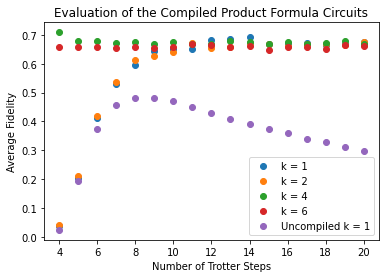

In [10]:
plt.scatter(range(4, 21), first_order_noisy_jakarta,  label = "k = 1")
plt.scatter(range(4, 21), second_order_noisy_jakarta, label = "k = 2")
plt.scatter(range(4, 21), fourth_order_noisy_jakarta, label = "k = 4")
plt.scatter(range(4, 21), sixth_order_noisy_jakarta, label = "k = 6")
plt.scatter(range(4, 21), unc_second_order_noisy_jakarta, label = "Uncompiled k = 1")

plt.title("Evaluation of the Compiled Product Formula Circuits")

plt.xticks(range(4, 21, 2))

plt.legend(loc='bottom right')

plt.xlabel("Number of Trotter Steps")
plt.ylabel("Average Fidelity")

plt.show()

### Manila Simulations

In [12]:
unc_second_order_noisy_manila = product_experiment(np.pi, order = 2, min_steps = 4, max_steps = 20, backend = noisy_manila, repetitions = 5, compiler = False, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0194 ± 0.0013
5 Trotterization steps
state tomography fidelity = 0.1871 ± 0.0013
6 Trotterization steps
state tomography fidelity = 0.3603 ± 0.0022
7 Trotterization steps
state tomography fidelity = 0.4492 ± 0.0047
8 Trotterization steps
state tomography fidelity = 0.4742 ± 0.0013
9 Trotterization steps
state tomography fidelity = 0.4749 ± 0.0022
10 Trotterization steps
state tomography fidelity = 0.4661 ± 0.0026
11 Trotterization steps
state tomography fidelity = 0.4512 ± 0.0018
12 Trotterization steps
state tomography fidelity = 0.4328 ± 0.0033
13 Trotterization steps
state tomography fidelity = 0.4143 ± 0.0024
14 Trotterization steps
state tomography fidelity = 0.3986 ± 0.0025
15 Trotterization steps
state tomography fidelity = 0.3791 ± 0.0029
16 Trotterization steps
state tomography fidelity = 0.3630 ± 0.0027
17 Trotterization steps
state tomography fidelity = 0.3460 ± 0.0037
18 Trotterization steps
state tomography fidelity = 0.

In [13]:
first_order_noisy_manila = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = noisy_manila, repetitions = 5, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0300 ± 0.0007
5 Trotterization steps
state tomography fidelity = 0.1971 ± 0.0029
6 Trotterization steps
state tomography fidelity = 0.4118 ± 0.0015
7 Trotterization steps
state tomography fidelity = 0.5340 ± 0.0041
8 Trotterization steps
state tomography fidelity = 0.5978 ± 0.0025
9 Trotterization steps
state tomography fidelity = 0.6451 ± 0.0023
10 Trotterization steps
state tomography fidelity = 0.6572 ± 0.0014
11 Trotterization steps
state tomography fidelity = 0.6540 ± 0.0006
12 Trotterization steps
state tomography fidelity = 0.6909 ± 0.0031
13 Trotterization steps
state tomography fidelity = 0.6888 ± 0.0014
14 Trotterization steps
state tomography fidelity = 0.6960 ± 0.0010
15 Trotterization steps
state tomography fidelity = 0.6729 ± 0.0019
16 Trotterization steps
state tomography fidelity = 0.6750 ± 0.0033
17 Trotterization steps
state tomography fidelity = 0.6727 ± 0.0037
18 Trotterization steps
state tomography fidelity = 0.

In [14]:
second_order_noisy_manila = product_experiment(np.pi, order = 2, min_steps = 4, max_steps = 20, backend = noisy_manila, repetitions = 5, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.0338 ± 0.0014
5 Trotterization steps
state tomography fidelity = 0.2054 ± 0.0020
6 Trotterization steps
state tomography fidelity = 0.4135 ± 0.0034
7 Trotterization steps
state tomography fidelity = 0.5324 ± 0.0013
8 Trotterization steps
state tomography fidelity = 0.6150 ± 0.0022
9 Trotterization steps
state tomography fidelity = 0.6247 ± 0.0021
10 Trotterization steps
state tomography fidelity = 0.6425 ± 0.0025
11 Trotterization steps
state tomography fidelity = 0.6766 ± 0.0028
12 Trotterization steps
state tomography fidelity = 0.6571 ± 0.0026
13 Trotterization steps
state tomography fidelity = 0.6607 ± 0.0018
14 Trotterization steps
state tomography fidelity = 0.6746 ± 0.0016
15 Trotterization steps
state tomography fidelity = 0.6701 ± 0.0038
16 Trotterization steps
state tomography fidelity = 0.6651 ± 0.0029
17 Trotterization steps
state tomography fidelity = 0.6718 ± 0.0011
18 Trotterization steps
state tomography fidelity = 0.

In [15]:
fourth_order_noisy_manila = product_experiment(np.pi, order = 4, min_steps = 4, max_steps = 20, backend = noisy_manila, repetitions = 5, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.7126 ± 0.0007
5 Trotterization steps
state tomography fidelity = 0.6800 ± 0.0009
6 Trotterization steps
state tomography fidelity = 0.6811 ± 0.0030
7 Trotterization steps
state tomography fidelity = 0.6775 ± 0.0018
8 Trotterization steps
state tomography fidelity = 0.6772 ± 0.0032
9 Trotterization steps
state tomography fidelity = 0.6720 ± 0.0009
10 Trotterization steps
state tomography fidelity = 0.6778 ± 0.0009
11 Trotterization steps
state tomography fidelity = 0.6715 ± 0.0025
12 Trotterization steps
state tomography fidelity = 0.6754 ± 0.0028
13 Trotterization steps
state tomography fidelity = 0.6782 ± 0.0028
14 Trotterization steps
state tomography fidelity = 0.6744 ± 0.0023
15 Trotterization steps
state tomography fidelity = 0.6727 ± 0.0022
16 Trotterization steps
state tomography fidelity = 0.6783 ± 0.0018
17 Trotterization steps
state tomography fidelity = 0.6757 ± 0.0022
18 Trotterization steps
state tomography fidelity = 0.

In [11]:
sixth_order_noisy_manila = product_experiment(np.pi, order = 6, min_steps = 4, max_steps = 20, backend = noisy_manila, repetitions = 5, compiler = True, verbose = False)

4 Trotterization steps
state tomography fidelity = 0.6635 ± 0.0010
5 Trotterization steps
state tomography fidelity = 0.6677 ± 0.0035
6 Trotterization steps
state tomography fidelity = 0.6660 ± 0.0015
7 Trotterization steps
state tomography fidelity = 0.6643 ± 0.0017
8 Trotterization steps
state tomography fidelity = 0.6673 ± 0.0024
9 Trotterization steps
state tomography fidelity = 0.6602 ± 0.0026
10 Trotterization steps
state tomography fidelity = 0.6653 ± 0.0012
11 Trotterization steps
state tomography fidelity = 0.6770 ± 0.0032
12 Trotterization steps
state tomography fidelity = 0.6731 ± 0.0018
13 Trotterization steps
state tomography fidelity = 0.6682 ± 0.0028
14 Trotterization steps
state tomography fidelity = 0.6698 ± 0.0021
15 Trotterization steps
state tomography fidelity = 0.6591 ± 0.0023
16 Trotterization steps
state tomography fidelity = 0.6661 ± 0.0040
17 Trotterization steps
state tomography fidelity = 0.6657 ± 0.0016
18 Trotterization steps
state tomography fidelity = 0.

### Quito Simulations

In [ ]:
unc_first_order_noisy_quito = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = noisy_quito, repetitions = 5, compiler = False, verbose = False)

In [ ]:
first_order_noisy_quito = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = noisy_quito, repetitions = 5, compiler = True, verbose = False)

In [ ]:
second_order_noisy_quito = product_experiment(np.pi, order = 2, min_steps = 4, max_steps = 20, backend = noisy_quito, repetitions = 5, compiler = True, verbose = False)

In [ ]:
fourth_order_noisy_quito = product_experiment(np.pi, order = 4, min_steps = 4, max_steps = 20, backend = noisy_quito, repetitions = 5, compiler = True, verbose = False)

In [ ]:
sixth_order_noisy_quito = product_experiment(np.pi, order = 6, min_steps = 4, max_steps = 20, backend = noisy_quito, repetitions = 5, compiler = True, verbose = False)

# Hardware Evaluation

## Quito Chip

In [ ]:
unc_first_order_quito = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = quito, repetitions = 5, compiler = False, verbose = False)

In [ ]:
first_order_quito = product_experiment(np.pi, order = 1, min_steps = 4, max_steps = 20, backend = quito, repetitions = 5, compiler = True, verbose = False)

In [ ]:
second_order_quito = product_experiment(np.pi, order = 2, min_steps = 4, max_steps = 20, backend = quito, repetitions = 5, compiler = True, verbose = False)

In [ ]:
fourth_order_quito = product_experiment(np.pi, order = 4, min_steps = 4, max_steps = 20, backend = quito, repetitions = 5, compiler = True, verbose = False)

In [ ]:
sixth_order_quito = product_experiment(np.pi, order = 6, min_steps = 4, max_steps = 20, backend = quito, repetitions = 5, compiler = True, verbose = False)